# Bank Marketing Prediction

The bank marketing data is related with direct marketing campaigns (phone calls) of a banking institution. 

The classification goal is to predict if the client will subscribe a term deposit (variable 'response').

## Attributes

- age (numeric)

- job : type of job *(categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")*

- marital : marital status *(categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)*

- education *(categorical: "unknown","secondary","primary","tertiary")*

- default: has credit in default? *(binary: "yes","no")*

- balance: average yearly balance, in euros *(numeric)*

- housing: has housing loan? *(binary: "yes","no")*

- loan: has personal loan? *(binary: "yes","no")*

### *Related with the last contact of the current campaign:*

- contact: contact communication type *(categorical: "unknown","telephone","cellular")*

- day: last contact day of the month *(numeric)*

- month: last contact month of year *(categorical: "jan", "feb", "mar", ..., "nov", "dec")*

- duration: last contact duration, in seconds *(numeric)*

### *Other attributes:*

- campaign: number of contacts performed during this campaign and for this client *(numeric, includes last contact)*

- pdays: number of days that passed by after the client was last contacted from a previous campaign *(numeric, -1 means client was not previously contacted)*

- previous: number of contacts performed before this campaign and for this client *(numeric)*

- poutcome: outcome of the previous marketing campaign *(categorical: "unknown","other","failure","success")*

### *Target variable:*

- response - has the client subscribed a term deposit? *(binary: yes, no)*

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank-marketing.csv')

In [3]:
bank_df = df.copy()

### *Converting the 'yes' and 'no' response in the bank data frame to numerical values 0 and 1 where 1 means 'yes' and 0 means 'no'*

In [4]:
bank_df.response = bank_df.response.replace({'yes': 1, 'no': 0}).astype('object')

#### *Since -1 in bank_df['pdays'] means that client was not previously contacted, it will be replaced with 0 whereever it exist in the dataset*

In [5]:
bank_df.pdays = bank_df.pdays.replace({-1 : 0})

### *Creating a new column to virtually represent the response values*

In [6]:
bank_df['response_value'] = bank_df['response'].replace({1: 'yes', 0: 'no'})

In [7]:
bank_df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_value
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,0,0,unknown,1,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,0,0,unknown,1,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,0,0,unknown,0,no


In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   salary          45211 non-null  int64 
 3   marital         45211 non-null  object
 4   education       45211 non-null  object
 5   targeted        45211 non-null  object
 6   default         45211 non-null  object
 7   balance         45211 non-null  int64 
 8   housing         45211 non-null  object
 9   loan            45211 non-null  object
 10  contact         45211 non-null  object
 11  day             45211 non-null  int64 
 12  month           45211 non-null  object
 13  duration        45211 non-null  int64 
 14  campaign        45211 non-null  int64 
 15  pdays           45211 non-null  int64 
 16  previous        45211 non-null  int64 
 17  poutcome        45211 non-null  object
 18  respon

### *Computing the centers of measure (statistics) for the bank marketing data set using the describe method*

In [9]:
bank_df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,41.015195,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,99.792615,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### *Computing the Correlation Coefficient of the bank marketing data and visualizing corr*

In [10]:
corr = bank_df.corr()
corr

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023841,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.015051,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003330,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093024,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001584,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088508,-0.032855
pdays,-0.023841,-0.015051,0.003330,-0.093024,-0.001584,-0.088508,1.000000,0.454288
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454288,1.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

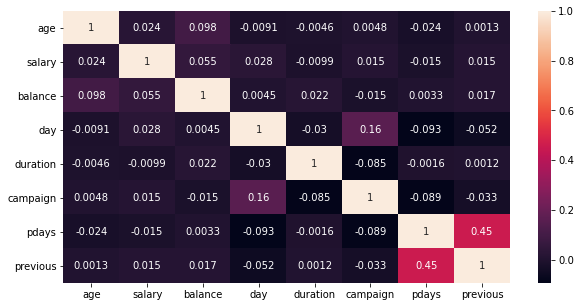

In [12]:
#sns.set(rc = {'figure.figsize':(15,8)})
fig = plt.figure(figsize=[10, 5])
sns.heatmap(corr, annot=True)

plt.show()


#### Observation:

- It is observed that no variables in the dataset has any correlation with **age, salary, duration and balance.**

- The **campaign** variables has a weak correlation with the **day** variables whilst having no correlation with the other variables in the data set.

- The **pdays variables** which is the number of days that passed by after the client was last contacted from a previous campaign and the **previous variables** has a weak correlation

### *Plotting the re,ationship between the pdays and previous variable based on the thesis from the observation above*

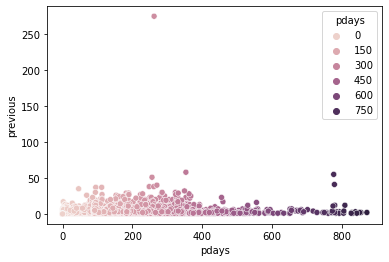

In [13]:
sns.scatterplot(x='pdays', y='previous', data=bank_df, hue='pdays');

### *Checking for missing values in the data set*

In [14]:
bank_df.isna().sum()

age               0
job               0
salary            0
marital           0
education         0
targeted          0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
response          0
response_value    0
dtype: int64

### *Computing the minimum, maximum and average salary earning*

In [15]:
print('The Minimum Salary is', bank_df.salary.min())
print('The Maximum Salary is', bank_df.salary.max())
print('The Average Salary is',  round(bank_df.salary.mean()))

The Minimum Salary is 0
The Maximum Salary is 120000
The Average Salary is 57006


*According to our findings, the **Minimum Salary** is $0 and it is possible as it could be that the individual is working with the company as a volunteer or an unpiad intenship etc*

### *Plotting the jobs count using a barplot and ordering it using the index of the job dataset*

The jobs present and their value counts in the dataset: 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


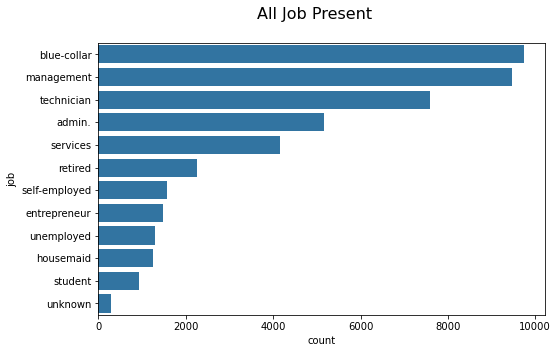

In [16]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('All Job Present', fontsize=16)
color_palette = sns.color_palette()[0]

print('The jobs present and their value counts in the dataset: \n', bank_df.job.value_counts())
ordered = bank_df.job.value_counts().index
sns.countplot(data=bank_df, y='job', color=color_palette, order=ordered)

plt.show()

#### Observation:

- From our analysis, it is observed that the jobs with the highest number in the data set is the blue-collar, management and technician.

- Also in our data set are candidates that are retired, some are self employed while some other are unemployed.

### *Plotting the poutcome, education, marital and contact count a subplot in bank marketing job dataset*


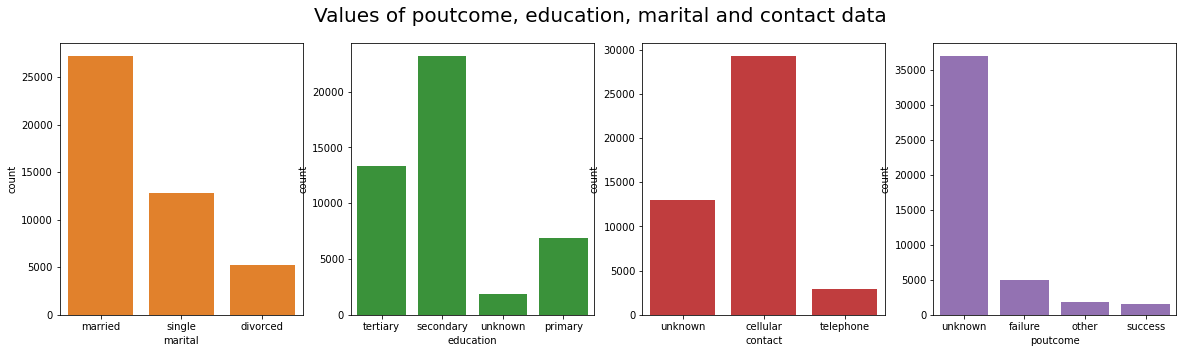

In [17]:
fig = plt.figure(figsize=[20, 5])
fig.suptitle('Values of poutcome, education, marital and contact data', fontsize=20)

plt.subplot(1, 4, 1)
color_palette = sns.color_palette()[1]
sns.countplot(data=bank_df, x='marital', color=color_palette)

plt.subplot(1, 4, 2)
color_palette = sns.color_palette()[2]
sns.countplot(data=bank_df, x='education', color=color_palette)

plt.subplot(1, 4, 3)
color_palette = sns.color_palette()[3]
sns.countplot(data=bank_df, x='contact', color=color_palette)

plt.subplot(1, 4, 4)
color_palette = sns.color_palette()[4]
sns.countplot(data=bank_df, x='poutcome', color=color_palette)

plt.show()

### *Plotting the percentage of marital status using a pie chart*

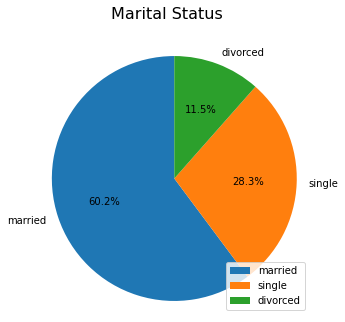

In [18]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('Marital Status', fontsize=16)

count = bank_df.marital.value_counts()
plt.pie(count, labels=count.index, autopct="%.1f%%", startangle=90)
plt.axis('square')
plt.legend(loc='lower right')


plt.show()

#### Observation:

- The majority of our candidates are married (60.2%) while the percentage of single and divorced is 28.3% and 11.5% respectively.

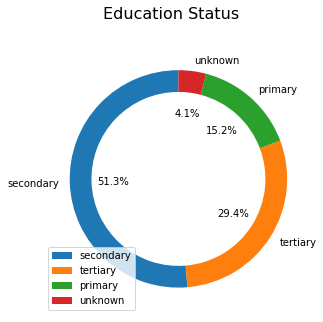

In [19]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('Education Status', fontsize=16)

count = bank_df.education.value_counts()
plt.pie(count,labels=count.index, autopct="%.1f%%", startangle=90, wedgeprops={'width': 0.2})
plt.legend(loc='lower left')


plt.show()

#### Observation:

- 51.3% of individuals in our data set have education status as **"secondary"**,  29.4% has tertiary, 15.2% have **"primary"** education status while 4.1% of our dataset education status is considered **"unknown"**.

### *Plotting a histogram for the distribution of age*

In [20]:
import numpy as np

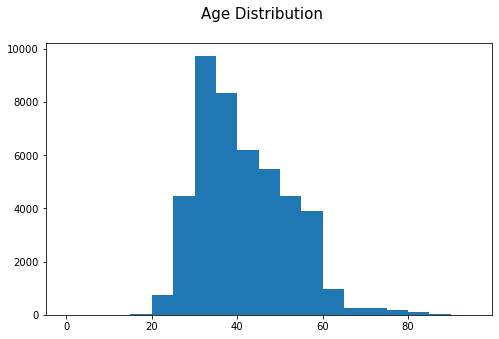

In [21]:
fig = plt.figure(figsize=[8, 5])
fig.suptitle('Age Distribution', fontsize=15)

Bin = np.arange(0, bank_df.age.max() + 3, 5)
plt.hist(data=bank_df, x='age', bins=Bin);

### *Plotting the semantic groupings to understand the relationship between the age and salary against the response variable*

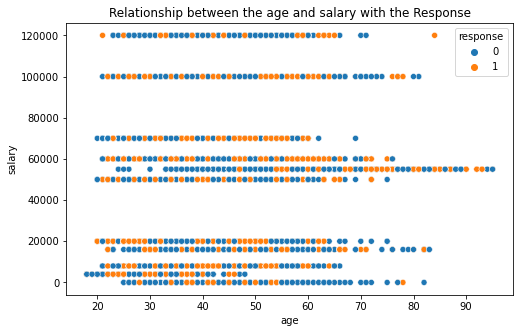

In [22]:
fig = plt.figure(figsize=[8, 5])

sns.scatterplot(x='age', y='salary', data=bank_df, hue='response').set(title='Relationship between the age and salary with the Response');

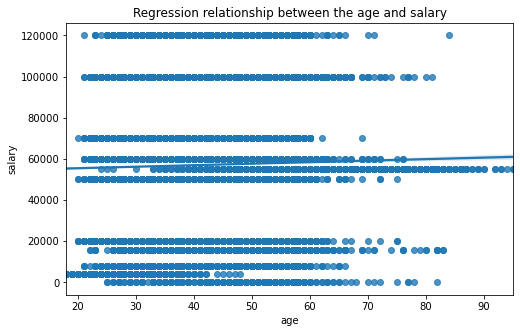

In [23]:
fig = plt.figure(figsize=[8, 5])

sns.regplot(x='age', y='salary', data=bank_df).set(title='Regression relationship between the age and salary');

In [24]:
dd = bank_df[['age', 'salary']]
dd.corr()

,age,salary
age,1.000000,0.024357
salary,0.024357,1.000000


### *Observation:*

- in the analysis, the age and salary are weakly correlated

### *Using the seaborn pairplot to visualize the entire variables in the bank marketing data acquired.*

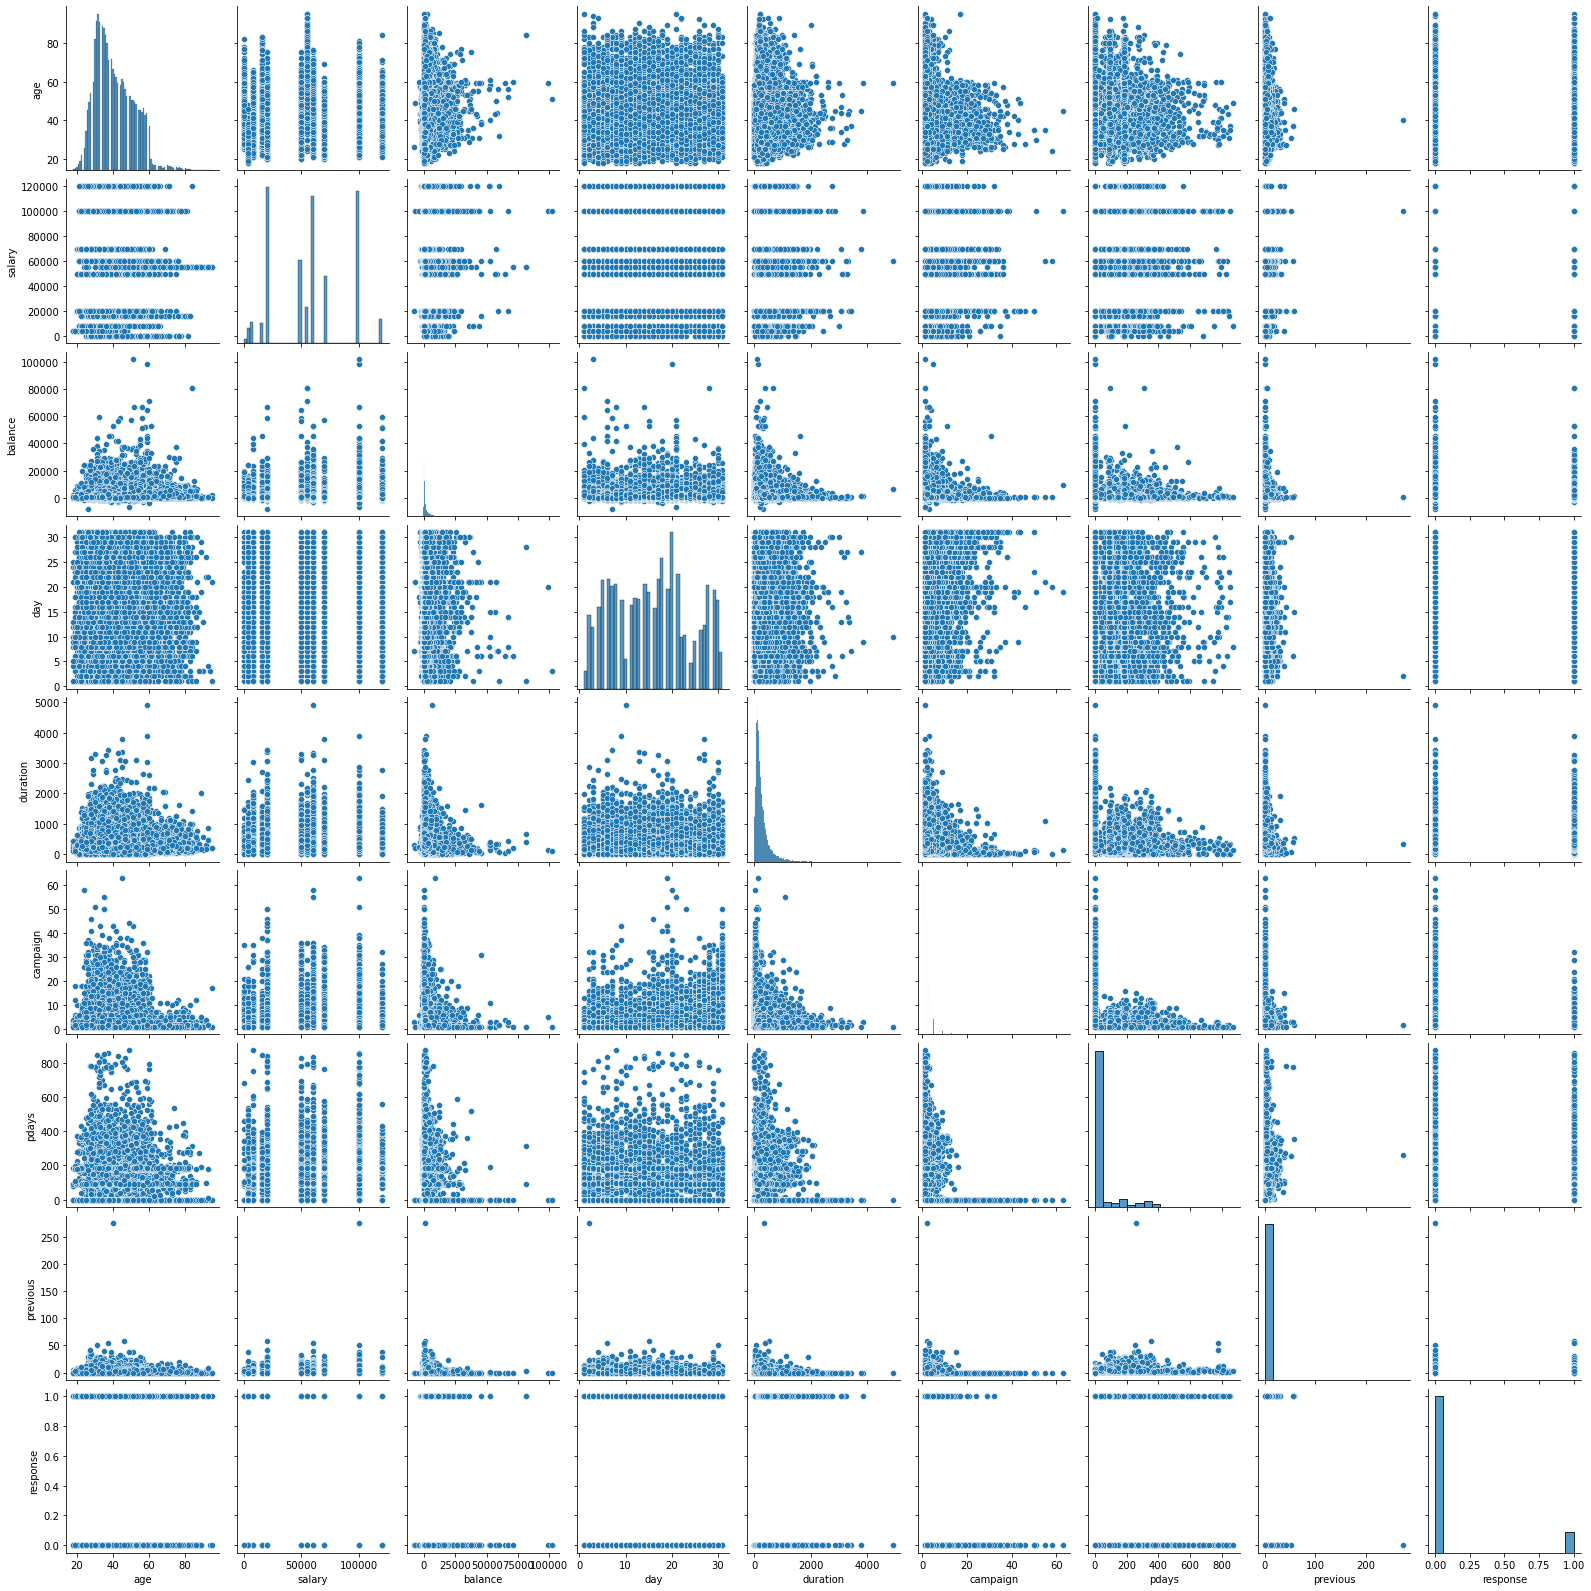

In [25]:
sns.pairplot(bank_df);

In [26]:
bank_df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_value
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,0,0,unknown,1,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,0,0,unknown,1,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,0,0,unknown,0,no


In [27]:
X = bank_df.filter(['age', 'salary', 'marital', 'education', 'targeted', 'default', 'balance', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'previous', 'poutcome'])
y = bank_df.response.astype('int')

In [28]:
X.dtypes

age           int64
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

### *Making the necessary transformations for the categorical variables*

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
cats_cols = list(X.columns[X.dtypes == 'object'])
print("categorical Columns:", cats_cols)

categorical Columns: ['marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [31]:
cats_encode = pd.get_dummies(X[cats_cols], drop_first=True)

### *Listing out the numerical categories*

In [32]:
nums_cols = list(X.columns[X.dtypes != 'object'])
print("Numerical Columns:", nums_cols)

Numerical Columns: ['age', 'salary', 'balance', 'campaign', 'pdays', 'previous']


### *Concatinating the encoded categorical columns with the numerical column*

In [33]:
cats_cols_new = pd.concat([cats_encode, X[nums_cols]], axis=1, join='inner')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### *To make our calculations more straightforward, we will scale and transform our data values to fit using the Standard Scaler.*

In [35]:
scaler = StandardScaler()

In [36]:
X = pd.DataFrame(scaler.fit_transform(cats_cols_new))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### *Making a predictive model using logistic regression*

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

### *Using RFE to select top number of features in an automated fashion*

In [40]:
from sklearn.feature_selection import RFE

In [41]:
# create the RFE model and select 6 attributes
model = RFE(model, n_features_to_select=6)

In [42]:
model.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=6)

In [43]:
pred = model.predict(X_test)

### *Getting the accuracy score of our predictive model*

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
score = accuracy_score(y_test, pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.8940578000589796


### *Comparing the Logistic Regression model and Random Forest Classifier*

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier()

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
rfc_pred = rfc.predict(X_test)

In [50]:
score = accuracy_score(y_test, rfc_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.885579475081097


### *Computing the accuracy of the confusion matrix and all other metrics for our model.*

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
accuracy = confusion_matrix(y_test, pred)
print('The Accuracy of Logistic Regression Model: \n', accuracy)

The Accuracy of Logistic Regression Model: 
 [[11859   139]
 [ 1298   268]]


In [53]:
accuracy_1 = confusion_matrix(y_test, rfc_pred)
print('The Accuracy of Random Forest Classifier Model: \n', accuracy_1)

The Accuracy of Random Forest Classifier Model: 
 [[11709   289]
 [ 1263   303]]


### *Using the predicted values(pred) and our actual values (y_test), we can create a confusion matrix with the confusion_matrix function.*

*Then, using the ravel( ) method of our confusion_matrix function, we can get the True Positive, True Negative, False Positive, and False Negative values*

In [54]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print('The true Negative for the Logistic Regression model is', tn)
print('False Positive for the Logistic Regression model is', fp)
print('False Negative for the Logistic Regression model is', fn)
print('True Positive for the Logistic Regression model is', tp)

The true Negative for the Logistic Regression model is 11859
False Positive for the Logistic Regression model is 139
False Negative for the Logistic Regression model is 1298
True Positive for the Logistic Regression model is 268


In [55]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
print('The true Negative for the Random Forest Classifier Model is', tn)
print('False Positive for the Random Forest Classifier Model is', fp)
print('False Negative for the Random Forest Classifier Model is', fn)
print('True Positive for the Random Forest Classifier Model is', tp)

The true Negative for the Random Forest Classifier Model is 11709
False Positive for the Random Forest Classifier Model is 289
False Negative for the Random Forest Classifier Model is 1263
True Positive for the Random Forest Classifier Model is 303


In [56]:
matrix = classification_report(y_test, pred)
print('Classification Report for the Logistic Regression Model: \n', matrix)

Classification Report for the Logistic Regression Model: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.66      0.17      0.27      1566

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [57]:
matrix = classification_report(y_test, rfc_pred)
print('Classification Report for the Random Forest Classifier Model: \n', matrix)

Classification Report for the Random Forest Classifier Model: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11998
           1       0.51      0.19      0.28      1566

    accuracy                           0.89     13564
   macro avg       0.71      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
auc_score = roc_auc_score(y_test, pred)
print('AUC Score for the logistic regression model is', auc_score)

AUC Score for the logistic regression model is 0.5797756948422863


In [60]:
auc_score = roc_auc_score(y_test, rfc_pred)
print('AUC Score for the Random Forest Classifier model is', auc_score)

AUC Score for the Random Forest Classifier model is 0.5846996210734996


### *Making a predictive model using Decision Tree*

In [61]:
from sklearn import tree

In [62]:
model = tree.DecisionTreeClassifier()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [64]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
dec_pred = model.predict(X_test)

In [66]:
score = accuracy_score(y_test, dec_pred)
print('The Accuracy Score is', score)

The Accuracy Score is 0.8201857859038632


### *Computing the classification report metrics for our decision tree model.*

In [67]:
matrix = classification_report(y_test, dec_pred)
print('Classification Report for the Decision Tree Classifier Model: \n', matrix)

Classification Report for the Decision Tree Classifier Model: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     11998
           1       0.25      0.27      0.26      1566

    accuracy                           0.82     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.82      0.82     13564



In [68]:
#tree.plot_tree(model)

In [69]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [71]:
import graphviz
import pydotplus
from IPython.display import Image 

In [72]:
model

DecisionTreeClassifier()

### *Visually plotting the decision tree model*

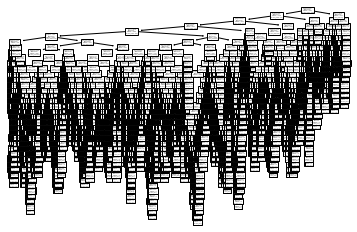

In [73]:
dot_data = tree.plot_tree(model)